## MLB Salaries Analysis
---

In [33]:
# Import modules 

import pandas as pd
import os

# Define path

file_path = r'c:\Users\Albrecht\Desktop\BC Class Repo\git_hub\project_slytherinteger\Resource\Salaries.csv'

# Read csv

teams_df = pd.read_csv(file_path)

# Display raw data from csv

teams_df.head()



,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [34]:
# Organize data and sum rows and columns

aggregated_df = teams_df.groupby(['yearID','teamID'])['salary'].sum().reset_index()
aggregated_df
 


,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178
...,...,...,...
913,2016,STL,143053500
914,2016,TBR,57097310
915,2016,TEX,176038723
916,2016,TOR,138701700


In [35]:
# Count of rows by column
aggregated_df.count()

yearID    918
teamID    918
salary    918
dtype: int64

In [36]:
# Import numpy module

import numpy as np

# Added CPI inflation rates
inflation_rates = [0.043, 0.040, 0.041, 0.044, 0.045, 0.050, 0.049, 0.037, 0.033, 0.028, 0.030, 0.027, 0.024, 0.023, 0.021, 0.024, 
                   0.026, 0.024, 0.014, 0.018, 0.022, 0.025, 0.023, 0.023, 0.017, 0.010, 0.017, 0.021, 0.018, 0.017, 0.018]

# Calculate cumulative inflation factors for each year
cumulative_factors = np.cumprod(1 + np.array(inflation_rates[::-1]))[::-1]

# Create a dictionary to map yearID to cumulative inflation factor
inflation_factors = dict(zip(range(1985, 2016), cumulative_factors))

# Calculate adjusted salary as buying power in terms of 2016
aggregated_df['adjusted_salary'] = aggregated_df.apply(
    lambda row: row['salary'] * inflation_factors.get(row['yearID'], 1),
    axis=1
).astype(int)

# Display the adjusted DataFrame

aggregated_df.head()

aggregated_df.to_csv("Output/adjusted_salary_output.csv", index=False)


In [37]:
# Display cumulative inflation rates
for year, factor in zip(range(1985, 2016), cumulative_factors):
    print(f'Year {year}: {factor}')

Year 1985: 2.313639622454676
Year 1986: 2.218254671576871
Year 1987: 2.13293718420853
Year 1988: 2.048931012688309
Year 1989: 1.9625775983604494
Year 1990: 1.8780646874262674
Year 1991: 1.788633035644064
Year 1992: 1.7050839233975825
Year 1993: 1.6442467920902437
Year 1994: 1.5917200310650956
Year 1995: 1.5483657889738285
Year 1996: 1.5032677562852703
Year 1997: 1.463746598135609
Year 1998: 1.4294400372418057
Year 1999: 1.397302089190426
Year 2000: 1.3685622812834732
Year 2001: 1.3364866028158917
Year 2002: 1.3026185212630523
Year 2003: 1.2720883996709496
Year 2004: 1.2545250489851574
Year 2005: 1.232342877195636
Year 2006: 1.2058149483323248
Year 2007: 1.1764048276412926
Year 2008: 1.1499558432466204
Year 2009: 1.124101508549971
Year 2010: 1.1053112178465794
Year 2011: 1.0943675424223558
Year 2012: 1.0760742796679998
Year 2013: 1.0539415079999999
Year 2014: 1.0353059999999998
Year 2015: 1.018


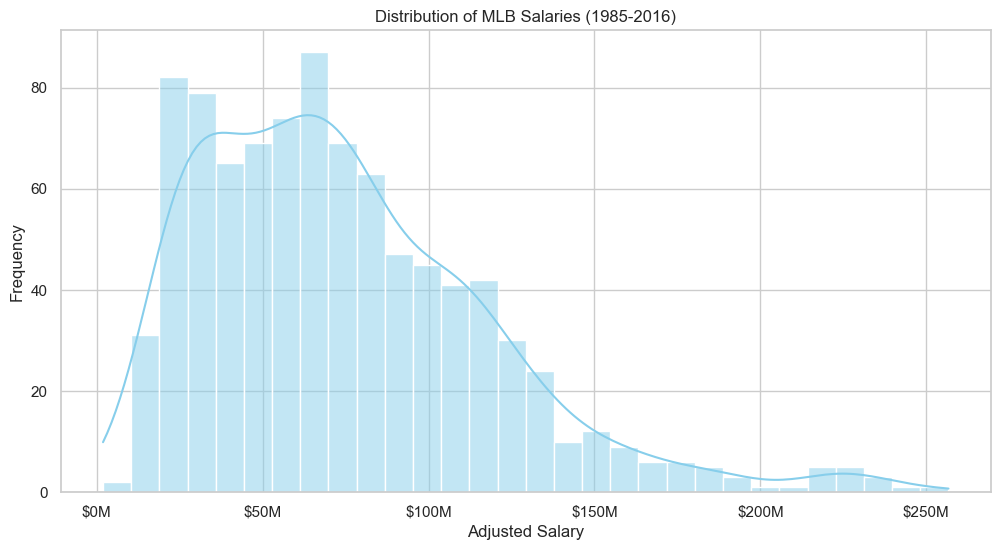

In [38]:
# Import style and plotting modules

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px

# Create "Output" file

output_dir = "Output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Set Seaborn style
sns.set(style="whitegrid")

# Distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(aggregated_df['adjusted_salary'], bins=30, kde=True, color='skyblue')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '${:,.0f}M'.format(x/1e6)))
plt.title('Distribution of MLB Salaries (1985-2016)')
plt.xlabel('Adjusted Salary')
plt.ylabel('Frequency')
plt.savefig("Output/distribution.png")
plt.show()





In [39]:
# Create summary statistics and print stats
 
adjusted_salary_stats = aggregated_df['adjusted_salary'].describe()

formatted_stats = {
    'count': '{:,.0f}'.format(adjusted_salary_stats['count']),
    'mean': '${:,.2f}'.format(adjusted_salary_stats['mean']),
    'std': '${:,.2f}'.format(adjusted_salary_stats['std']),
    'min': '${:,.2f}'.format(adjusted_salary_stats['min']),
    '25%': '${:,.2f}'.format(adjusted_salary_stats['25%']),
    '50%': '${:,.2f}'.format(adjusted_salary_stats['50%']),
    '75%': '${:,.2f}'.format(adjusted_salary_stats['75%']),
    'max': '${:,.2f}'.format(adjusted_salary_stats['max']),
}
print("Summary Statistics for MLB Salaries:")
for stat, value in formatted_stats.items():
    print(f"{stat.capitalize()}: {value}")




Summary Statistics for MLB Salaries:
Count: 918
Mean: $74,411,554.02
Std: $43,722,437.93
Min: $1,876,984.00
25%: $40,273,874.00
50%: $67,606,525.00
75%: $100,890,805.00
Max: $256,705,422.00


In [40]:
# Box plot with whiskers
plt.figure(figsize=(16, 6))
aggregated_df['teamID'] = pd.Categorical(aggregated_df['teamID'])
fig = px.box(aggregated_df, x='adjusted_salary', category_orders={'teamID': aggregated_df['teamID'].unique()}, 
             points="all", hover_data=['teamID', 'yearID'])
fig.update_traces(boxmean='sd', jitter=0.3, pointpos=-1.8) 
fig.update_layout(xaxis_tickformat='${:,0f}M',
                  boxmode='group',
                  title='Box Plot of MLB Salaries (1985-2016)',
                  xaxis_title='Adjusted Salary',
                  yaxis_title='Team ID',
                  title_x=0.25
                  )

# Save boxplot to "Output" folder

plt.savefig("Output/boxplot.png")

# Display boxplot

fig.show()

<Figure size 1600x600 with 0 Axes>

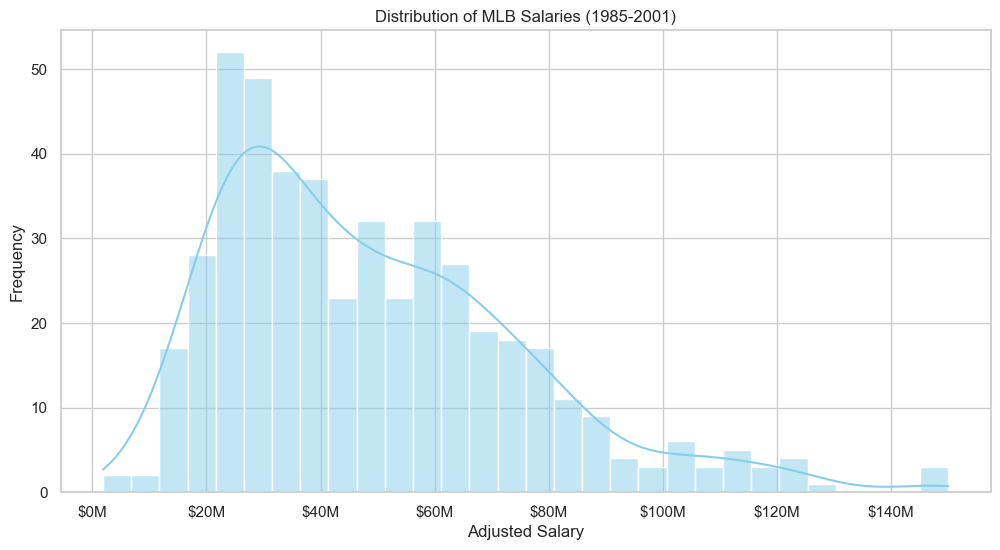

In [41]:
# Filter dataframe for range of years 

filtered_df = aggregated_df[(aggregated_df['yearID'] >= 1985) & (aggregated_df['yearID'] <= 2001)]

# Distribution plot 
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['adjusted_salary'], bins=30, kde=True, color='skyblue')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '${:,.0f}M'.format(x/1e6)))
plt.title('Distribution of MLB Salaries (1985-2001)')
plt.xlabel('Adjusted Salary')
plt.ylabel('Frequency')

# Save distribution to "Output" folder

plt.savefig("Output/distribution_pre.png")

# Display distribution

plt.show()

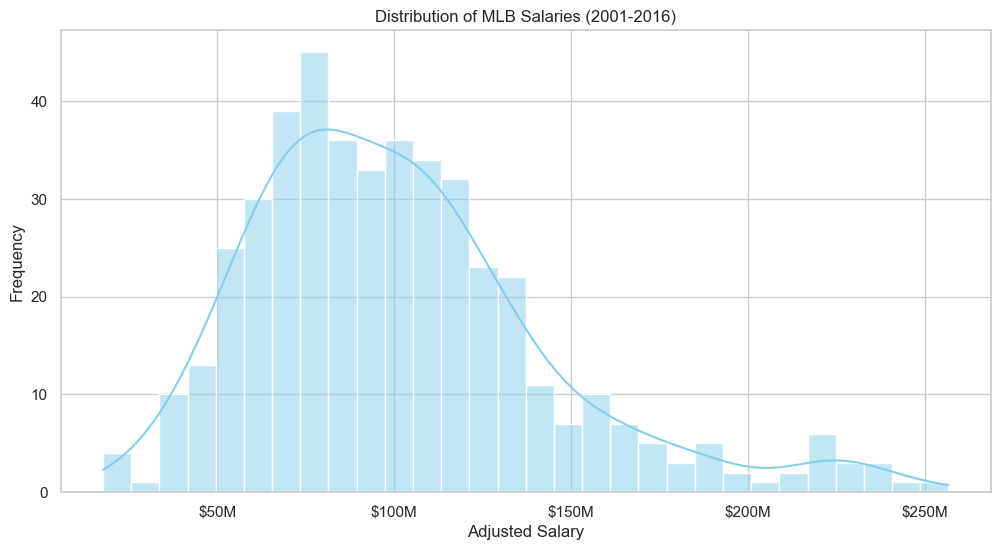

In [42]:
# Filter df to analyze rang of years

filtered_df = aggregated_df[(aggregated_df['yearID'] > 2001)]

# Distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['adjusted_salary'], bins=30, kde=True, color='skyblue')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '${:,.0f}M'.format(x/1e6)))
plt.title('Distribution of MLB Salaries (2001-2016)')
plt.xlabel('Adjusted Salary')
plt.ylabel('Frequency')

# Save distribution to "Output" folder

plt.savefig("Output/distribution_post.png")

# Display distribution

plt.show()

In [43]:
# Filter dataframe by ranges:

filtered_df = aggregated_df[(aggregated_df['yearID'] >= 1985) & (aggregated_df['yearID'] <= 2001)].copy()


# Boxplot with whiskers

plt.figure(figsize=(16, 6))
filtered_df['teamID'] = pd.Categorical(filtered_df['teamID'])
fig = px.box(filtered_df, x='adjusted_salary', category_orders={'teamID': filtered_df['teamID'].unique()}, 
             points="all", hover_data=['teamID', 'yearID'])
fig.update_traces(boxmean='sd', jitter=0.3, pointpos=-1.8) 
fig.update_layout(xaxis_tickformat='${:,0f}M',
                  boxmode='group',
                  title='Box Plot of MLB Salaries (1985-2001)',
                  xaxis_title='Adjusted Salary',
                  yaxis_title='Team ID',
                  title_x=0.25
                  )

# Save boxplot to "Output" folder

plt.savefig("Output/boxplot_pre.png")

# Display boxplot

fig.show()

<Figure size 1600x600 with 0 Axes>

In [44]:
# Filter dataframe by ranges

filtered_df = aggregated_df[(aggregated_df['yearID'] > 2001)].copy()

# Boxplot with whiskers

plt.figure(figsize=(16, 6))
filtered_df['teamID'] = pd.Categorical(filtered_df['teamID'])
fig = px.box(filtered_df, x='adjusted_salary', category_orders={'teamID': filtered_df['teamID'].unique()}, 
             points="all", hover_data=['teamID', 'yearID'])
fig.update_traces(boxmean='sd', jitter=0.3, pointpos=-1.8) 
fig.update_layout(xaxis_tickformat='${:,0f}M',
                  boxmode='group',
                  title='Box Plot of MLB Salaries (2002-2016)',
                  xaxis_title='Adjusted Salary',
                  yaxis_title='Team ID',
                  title_x=0.25
                  )

# Save boxplot to "Output" folder

plt.savefig("Output/boxplot_post.png")

# Display boxplot

fig.show()

<Figure size 1600x600 with 0 Axes>

In [45]:
# Import scipy module for statistical analysis

import scipy.stats as stats

# Define dataframe for mean analysis

filtered_df1 = aggregated_df[(aggregated_df['yearID'] >= 1985) & (aggregated_df['yearID'] <= 2001)].copy()

# Determine mean of dataframe 1

pre_moneyball_mean = filtered_df1.adjusted_salary.mean()

# Display mean for dataframe 1

pre_moneyball_mean

48789168.950854704

In [46]:

# Define dataframe for mean analysis

filtered_df2 = aggregated_df[(aggregated_df['yearID'] > 2001)].copy()

# Determine mean for dataframe 2

post_moneyball_mean = filtered_df2.adjusted_salary.mean()

# Display mean for dataframe 2

post_moneyball_mean


101058834.49333334

In [47]:
# Perform independent ttest

stats.ttest_ind(filtered_df1.adjusted_salary, filtered_df2.adjusted_salary, equal_var=False)

TtestResult(statistic=-22.380967997215112, pvalue=3.3862771832319186e-85, df=742.6653047668203)